# Exploratory Data Analysis

In [15]:
# loading necessary libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading the transformed dataset
df = pd.read_csv("../data/transformed_lung_cancer.csv")
df.head()

,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,treatment_type,end_treatment_date,survived,treatment_duration,comorbidities_count,age_group,bmi_category,cholesterol_category
0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,Surgery,2024-06-17,1,424,2,adults,obese,High
1,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,Combined,2024-04-09,0,370,2,elderly,obese,High
2,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,Combined,2025-01-08,0,406,0,adults,normal,Desirable
3,Male,Italy,2023-01-02,Stage I,No,Never Smoked,Radiation,2024-12-27,0,725,1,adults,obese,High
4,Female,Luxembourg,2023-12-24,Stage IV,No,Never Smoked,Surgery,2024-10-28,1,309,2,adults,obese,High


**1) How many patients were young adults (18-35 years old) at the time of diagnosis?**

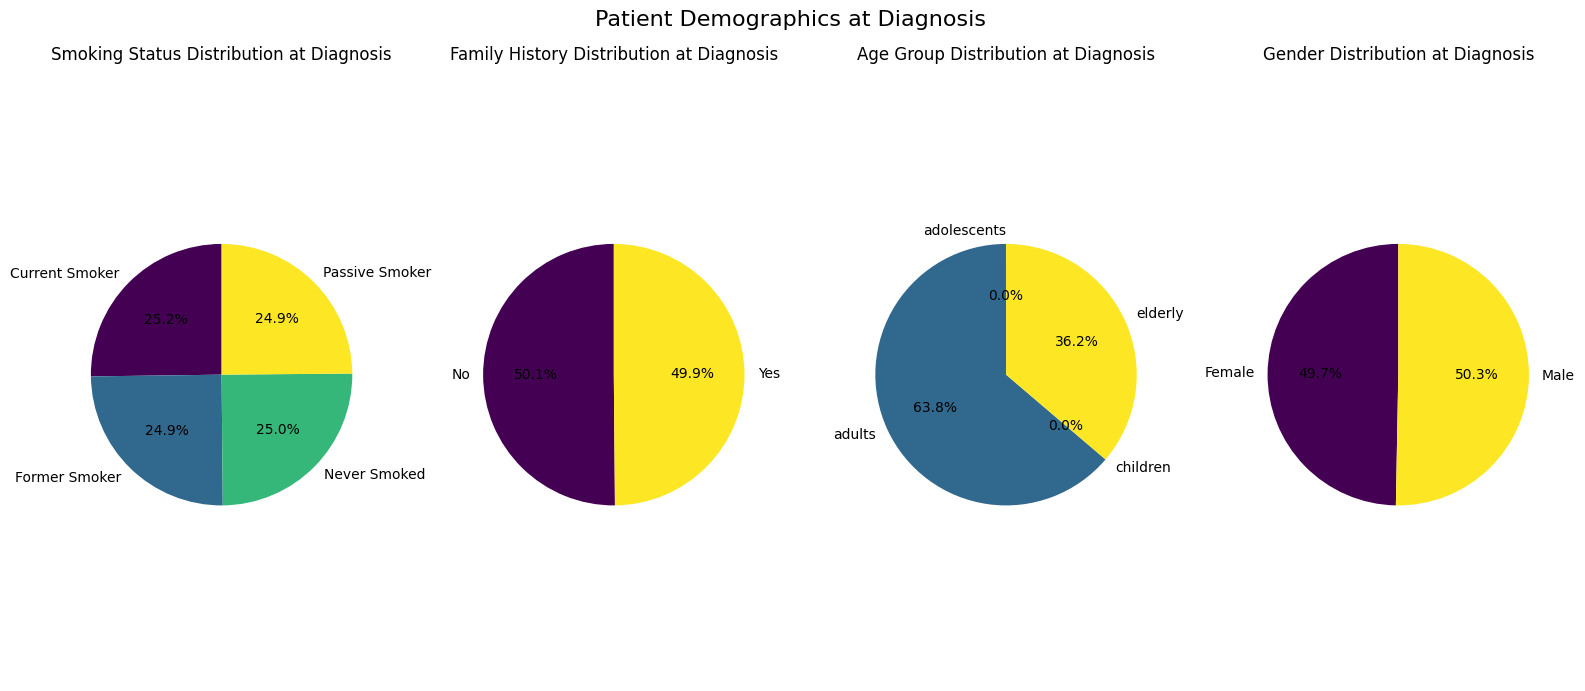

In [43]:
fig, axes = plt.subplots(1, 4, figsize=(16, 7))

# Pie chart for smoking_status
df['smoking_status'].value_counts().sort_index().plot(
    kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis', ax=axes[0]
)
axes[0].set_title('Smoking Status Distribution at Diagnosis')
axes[0].set_ylabel('')
axes[0].axis('equal')

# Pie chart for family_history
df['family_history'].value_counts().sort_index().plot(
    kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis', ax=axes[1]
)
axes[1].set_title('Family History Distribution at Diagnosis')
axes[1].set_ylabel('')
axes[1].axis('equal')

# pie chart for age_group
df['age_group'].value_counts().sort_index().plot(
    kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis', ax=axes[2]
)
axes[2].set_title('Age Group Distribution at Diagnosis')
axes[2].set_ylabel('')
axes[2].axis('equal')

# pie chart for gender
df['gender'].value_counts().sort_index().plot(
    kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis', ax=axes[3]
)
axes[3].set_title('Gender Distribution at Diagnosis')
axes[3].set_ylabel('')
axes[3].axis('equal')

plt.subplots_adjust(wspace=0.3)
# Overall title for the figure
plt.suptitle('Patient Demographics at Diagnosis', fontsize=16)
plt.tight_layout()
plt.show()

First pie chart:

*From the data we can conclude that majority of the patients diagnosed with lung cancer were current smokers. However, there is a significant number of patients who were former smokers, indicating that smoking cessation may have a positive impact on lung cancer diagnosis. The pie chart shows that only a small percentage of patients were non-smokers at the time of diagnosis, suggesting that smoking is a major risk factor for lung cancer.*

Second pie chart:

*From the data we can conclude that majority of the patients diagnosed with lung cancer did not have family history of lung cancer. However, there is a significant number of patients who had a family history, indicating that genetic factors may play a role in lung cancer diagnosis. The pie chart shows that only a small percentage of patients had a family history of lung cancer, suggesting that while it is a risk factor, it is not the most common one.*

Third pie chart:

*From the data we can conclude that majority of the patients diagnosed with lung cancer are adults aged 36-55 years old, followed by those aged 56-75 years old. The pie chart shows that only a small percentage of patients were young adults (18-35 years old) at the time of diagnosis, indicating that lung cancer is more prevalent in middle-aged and older adults.*

Fourth pie chart:
*From the data we can conclude that majority of the patients diagnosed with lung cancer were male. The pie chart shows that only a small percentage of patients were female, indicating that lung cancer is more prevalent in males.*

**2) What is the survival rate of patients based on cancer stage and treatment type?**

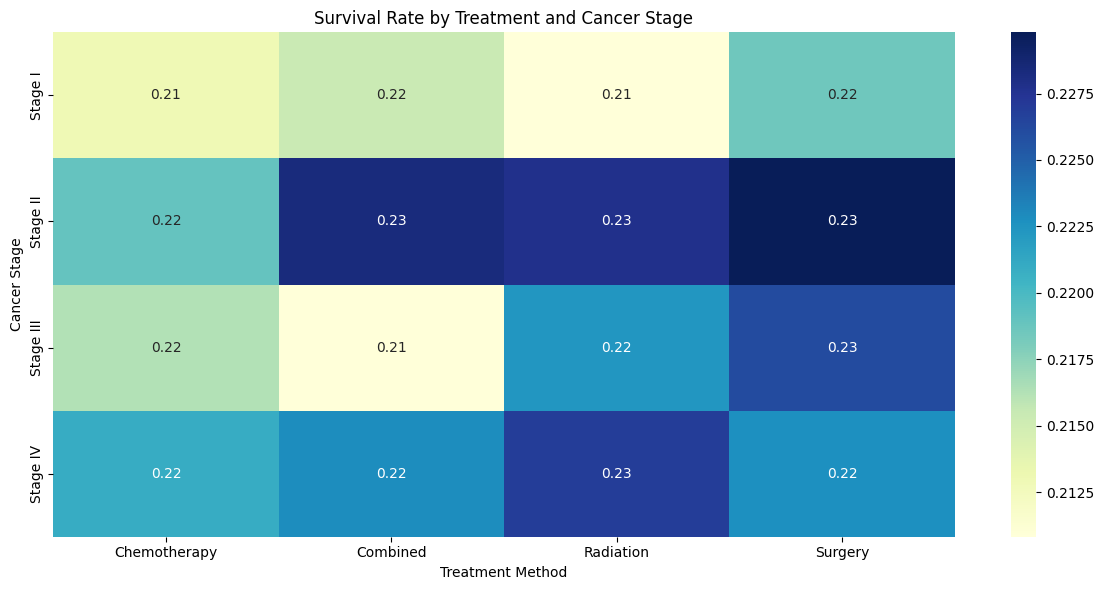

In [21]:
# Group by stage and treatment, then calculate survival rate
survival_rate = df.groupby(['cancer_stage', 'treatment_type'])['survived' ].mean().reset_index()

# Pivot for visualization
pivot_table = survival_rate.pivot(index='cancer_stage', columns='treatment_type', values='survived' )

# Plot a heatmap of survival rates
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Survival Rate by Treatment and Cancer Stage")
plt.ylabel("Cancer Stage")
plt.xlabel("Treatment Method")
plt.tight_layout()
plt.show()


The heatmap above illustrates the survival rates of patients based on their cancer stage and treatment type. Here is a summary of the findings:
- **Stage I**: Patients in this stage have the highest survival rate across all treatment types, with surgery showing the highest rate.
- **Stage II**: The survival rate is lower than Stage I, with surgery again showing the highest rate.
- **Stage III**: The survival rate drops significantly, especially for chemotherapy and radiation treatments.
- **Stage IV**: This stage has the lowest survival rates, with radiation showing a slightly higher rate of survival.

**3) What happens to the survival rate for patients with comorbidities?**

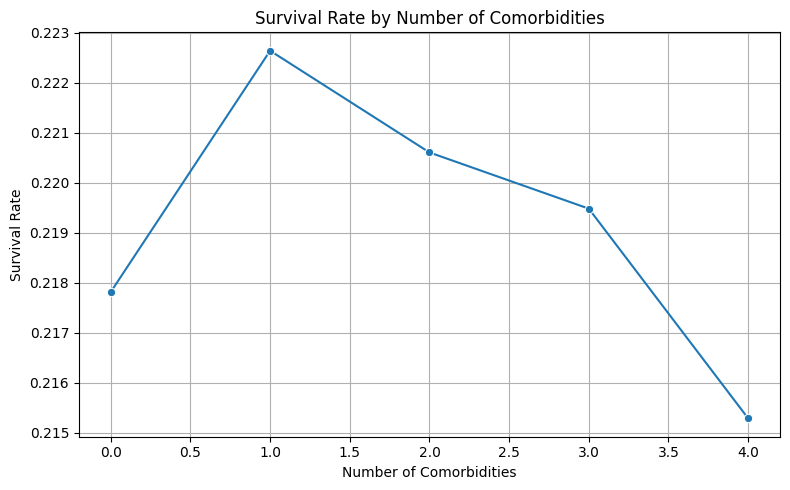

,comorbidities_count,survived
0,0,0.217818
1,1,0.222643
2,2,0.220608
3,3,0.219484
4,4,0.215290


In [22]:
# Analyze survival rate based on comorbidity count
comorbidity_survival = df.groupby('comorbidities_count')['survived'].mean().reset_index()

# Plotting the result
plt.figure(figsize=(8, 5))
sns.lineplot(data=comorbidity_survival, x='comorbidities_count', y='survived', marker='o')
plt.title("Survival Rate by Number of Comorbidities")
plt.xlabel("Number of Comorbidities")
plt.ylabel("Survival Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

comorbidity_survival.sort_values('comorbidities_count')


*The survival rate is consistently low across all comorbidity levels, fluctuating around ~21–22%. There is no significant trend showing that having more comorbidities drastically worsens survival, but a slight dip is observed at 4 comorbidities.*

**4) Does the treatment type affect the survival rate of patients with comorbidities? What is the survival rate for patients with comorbidities based on cancer stage?**

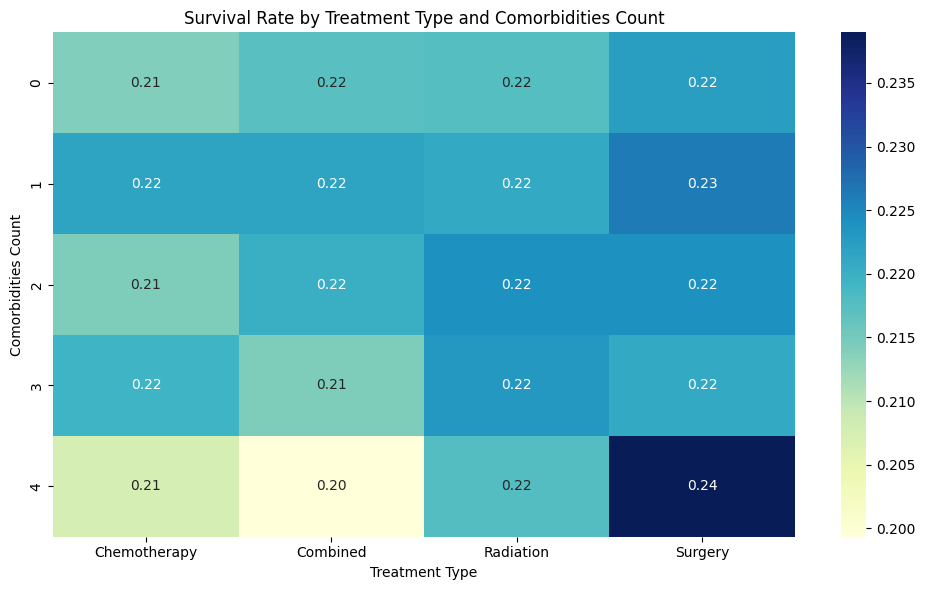

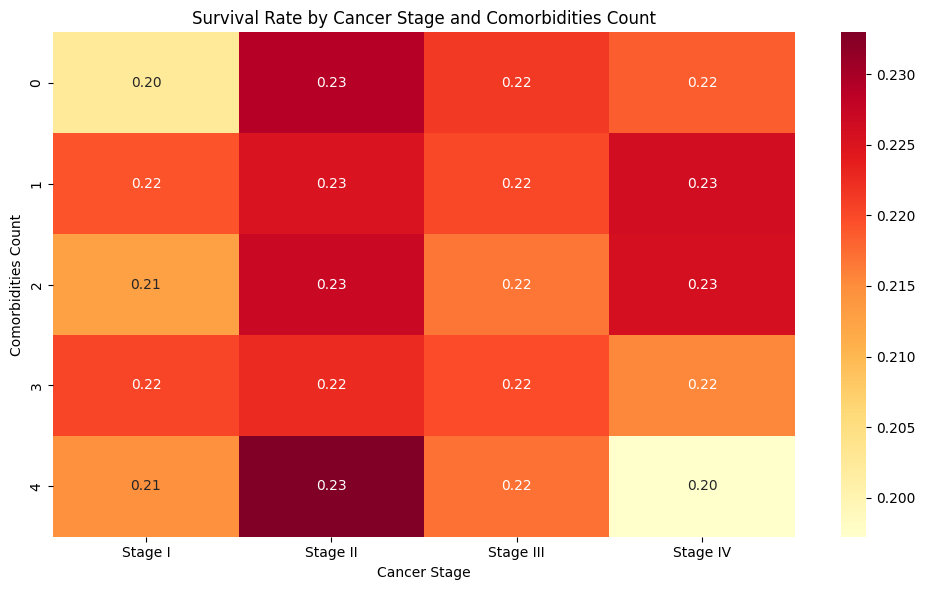

In [24]:
# First analysis: Survival rate by treatment type and comorbidities
treatment_comorbidity_survival = df.groupby(['treatment_type', 'comorbidities_count'])['survived'].mean().reset_index()

# Pivot for heatmap
pivot_tc = treatment_comorbidity_survival.pivot(index='comorbidities_count', columns='treatment_type', values='survived')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_tc, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Survival Rate by Treatment Type and Comorbidities Count")
plt.xlabel("Treatment Type")
plt.ylabel("Comorbidities Count")
plt.tight_layout()
plt.show()

# Second analysis: Survival rate by cancer stage and comorbidities
stage_comorbidity_survival = df.groupby(['cancer_stage', 'comorbidities_count'])['survived'].mean().reset_index()

# Pivot for heatmap
pivot_sc = stage_comorbidity_survival.pivot(index='comorbidities_count', columns='cancer_stage', values='survived')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_sc, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Survival Rate by Cancer Stage and Comorbidities Count")
plt.xlabel("Cancer Stage")
plt.ylabel("Comorbidities Count")
plt.tight_layout()
plt.show()


*Survival Rate by Treatment Type & Comorbidities*

- Surgery generally shows the highest survival rates across all comorbidity levels.
- Radiation and Combined treatments have consistently lower survival rates, especially when comorbidities increase.
- Survival drops slightly as comorbidities increase, especially for non-surgical treatments.

*Survival Rate by Cancer Stage & Comorbidities*

- Stage I patients have noticeably higher survival rates regardless of comorbidities.
- Stage IV patients show the lowest survival rates across all comorbidity counts.

The number of comorbidities has minimal variation in survival within each stage; stage is a stronger predictor than comorbidity count alone.

**5) How many patients were treated with chemotherapy, radiation or surgery and survived?**

<Figure size 1000x600 with 0 Axes>

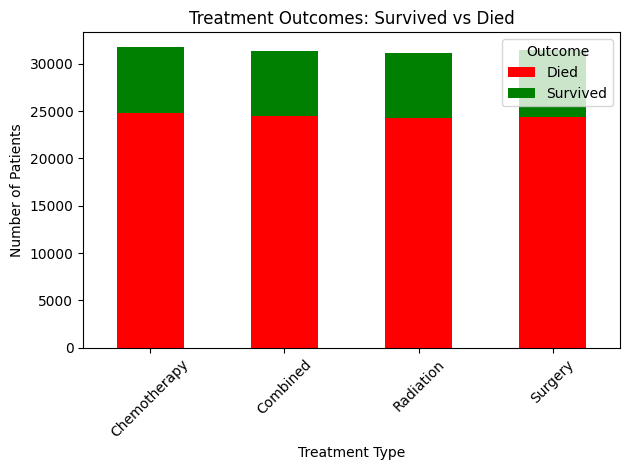

,Died,Survived
treatment_type,,
Chemotherapy,24839,6895
Combined,24498,6883
Radiation,24248,6918
Surgery,24410,7058


In [33]:
# Count the number of survivors and deaths per treatment type
treatment_outcome_counts = df.groupby(['treatment_type', 'survived']).size().reset_index(name='count')

# Pivot the result for a clearer comparison
treatment_outcome_pivot = treatment_outcome_counts.pivot(index='treatment_type', columns='survived', values='count')
treatment_outcome_pivot.columns = ['Died', 'Survived']  # Rename for clarity

# Fill missing values with 0 if any
treatment_outcome_pivot = treatment_outcome_pivot.fillna(0).astype(int)

# Plotting the treatment outcomes
plt.figure(figsize=(10, 6))
treatment_outcome_pivot.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title("Treatment Outcomes: Survived vs Died")
plt.xlabel("Treatment Type")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.legend(title='Outcome', labels=['Died', 'Survived'])
plt.tight_layout()
plt.show()
treatment_outcome_pivot


**6) How long did the patients survive from the time of diagnosis to the end of treatment based on the treatment type used.**

In [37]:
# Group by treatment type and survival status, compute average survival duration
avg_survival_duration = df.groupby(['treatment_type', 'survived'])['treatment_duration'].mean().reset_index()

# Label the survival column
avg_survival_duration['status'] = avg_survival_duration['survived'].map({1: 'Survived', 0: 'Died'})

# Drop original survived column for clarity
avg_survival_duration = avg_survival_duration.drop(columns='survived')

# Pivot for a clearer table view
avg_survival_pivot = avg_survival_duration.pivot(index='treatment_type', columns='status', values='treatment_duration')
avg_survival_pivot

status,Died,Survived
treatment_type,,
Chemotherapy,458.896695,459.742422
Combined,458.016165,458.740811
Radiation,458.136011,456.778693
Surgery,457.746088,457.247521


**7) How many patients were admitted to the hospital for treatment in 2023?**

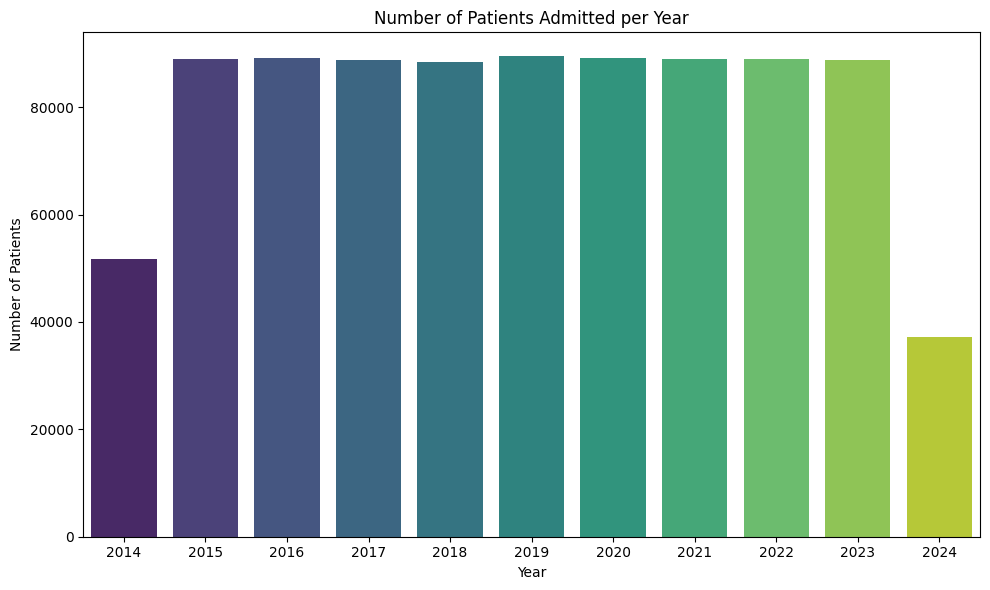

,Year,Number of Patients
0,2014,51769
1,2015,89000
2,2016,89252
3,2017,88848
4,2018,88486
5,2019,89478
6,2020,89185
7,2021,89039
8,2022,88931
9,2023,88847


In [41]:
# Using all data
lung_cancer_data = pd.read_csv("../data/Lung Cancer.csv")
# Convert diagnosis_date to datetime
lung_cancer_data['diagnosis_date'] = pd.to_datetime(lung_cancer_data['diagnosis_date'])
# Extract the year from the diagnosis_date
lung_cancer_data['diagnosis_year'] = lung_cancer_data['diagnosis_date'].dt.year

# Count number of patients admitted per year
admissions_per_year = lung_cancer_data['diagnosis_year'].value_counts().sort_index().reset_index()
admissions_per_year.columns = ['Year', 'Number of Patients']

# Plotting the number of patients admitted per year
plt.figure(figsize=(10, 6))
sns.barplot(data=admissions_per_year, x='Year', y='Number of Patients', palette='viridis')
plt.title("Number of Patients Admitted per Year")
plt.xlabel("Year")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()
admissions_per_year


*From the data, we can see that the number of patients admitted to hospital has been high since 2015 to 2023. However, a
significant decrease in the number of patients admitted to hospital was observed in 2024. This could be due to various factors such as improved treatment options, increased awareness about lung cancer, or changes in healthcare policies or data irregularities.*

**8) Which country had the highest number of patients diagnosed with lung cancer?**

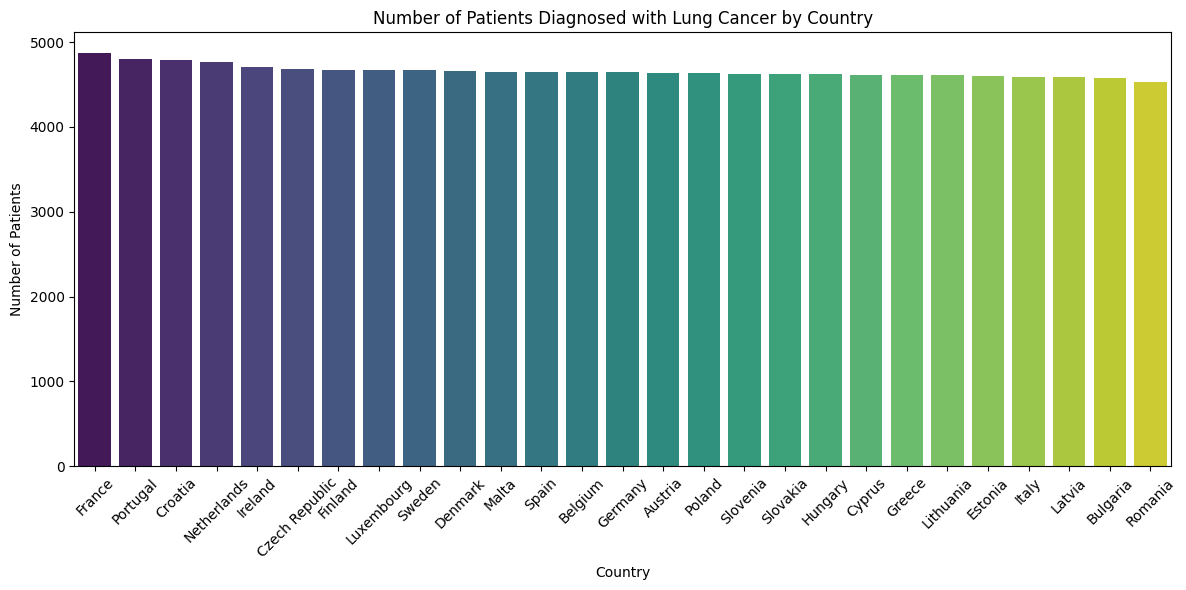

Country               France
Number of Patients      4873
Name: 0, dtype: object

In [44]:
# Counts admissions per counrtry
country_admissions = df['country'].value_counts().reset_index()
country_admissions.columns = ['Country', 'Number of Patients']

# Plotting the number of patients diagnosed with lung cancer by country
plt.figure(figsize=(12, 6))
sns.barplot(data=country_admissions, x='Country', y='Number of Patients', palette='viridis')
plt.title("Number of Patients Diagnosed with Lung Cancer by Country")
plt.xlabel("Country")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Display the country with the highest number of patients
highest_country = country_admissions.loc[country_admissions['Number of Patients'].idxmax()]
highest_country

*From the plot, we can conclude that France had the highest number of patient admission while Romania had the least*
